In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

2.226965010358839 16.872999260069676
-23.063704988974607 33.47683252889327
-82.8950386435955 36.93790212215663
-28.642977437471288 42.586843050651254
-30.920414034610758 53.270283518796276
-71.49264813628604 -26.09431948828147
-51.006374021005264 -87.02462444503612
-44.81445993222427 -71.99498014012482
-9.107946422794441 59.41166102831892
-25.384489134517494 21.131539537080016
67.93581519153187 83.87924039177636
-70.41543997966903 -59.60672249145277
60.95266894830755 71.42753555061884
-78.71245042852551 -8.727308355159522
59.63571429794564 9.430352871605606
76.98654020562907 62.68941408984102
-55.0080479146739 -17.17435205795624
-64.65817640161993 44.86464307210741
75.8905090574857 -64.91872186515299
40.38271607290076 -14.340379627119816
4.015643243716639 65.82936087596059
-40.83044364636019 -56.25540399462025
38.214601454109584 -6.111577856657817
42.58872028685977 -75.39697034890575
-38.584963540478896 -74.59841707697308
85.12829232205016 77.1975406285685
59.4265942292684 -24.64541184

11.187541582613107 -73.72947450267665
7.641203224815698 -88.74315508650034
-49.38942042849929 68.83697813938494
2.239040752616816 -63.70307009039162
-11.196822869840275 -70.89885022160692
77.03264299778039 -11.475206528964108
89.76695038730577 -40.00523761527503
-9.019351248531791 18.4084831664715
-25.231081697394572 26.139375411727983
-20.666448020689757 -35.94275375142039
45.53063050323854 25.23413956357173
21.644173539126413 -19.556570316516115
1.4591534349920323 -18.23689147930766
-71.14330976484172 -69.02266657932131
54.59658052374357 -19.137751868850415
69.09916879981145 48.27899264720361
47.832989924704066 31.53854758933977
75.79524764555134 21.208781339537737
-85.82821143169402 71.09085064490765
48.99547695118778 45.48667984347455
76.30609899697939 -51.95058510527893
-84.07493580780613 72.11223467705398
64.05472746352731 -42.53631067141476


In [5]:
#Import citipy module
from citipy import citipy

In [6]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

632

In [7]:
#Import the requests library and API key
import requests
from config import weather_api_key

In [8]:
#Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [10]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in the list
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") + "&units=imperial"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ouesso
Processing Record 2 of Set 1 | chokwe
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | beloha
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | coihaique
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | tsabong
Processing Record 11 of Set 1 | karaul
City not found. Skipping...
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | notodden
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | peniche
Processing Record 20 of Set 1 | mahibadhoo
Processing Record 21 of Set 1 | mar del pla

Processing Record 36 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 4 | sao jose da coroa grande
Processing Record 38 of Set 4 | filadelfia
Processing Record 39 of Set 4 | mankono
Processing Record 40 of Set 4 | thinadhoo
Processing Record 41 of Set 4 | maragogi
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | ostrovnoy
Processing Record 44 of Set 4 | ouadda
Processing Record 45 of Set 4 | oussouye
Processing Record 46 of Set 4 | svetlyy
Processing Record 47 of Set 4 | taltal
Processing Record 48 of Set 4 | maceio
Processing Record 49 of Set 4 | hambantota
Processing Record 50 of Set 4 | muravlenko
Processing Record 1 of Set 5 | mandera
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | general roca
Processing Record 4 of Set 5 | aguadilla
Processing Record 5 of Set 5 | ugoofaaru
Processing Record 6 of Set 5 | inhambane
Processing Record 7 of Set 5 | seversk
Processing Record 8 of Set 5 | isla mujeres
Processi

Processing Record 22 of Set 8 | lagos
Processing Record 23 of Set 8 | reconquista
Processing Record 24 of Set 8 | alta floresta
Processing Record 25 of Set 8 | nouadhibou
Processing Record 26 of Set 8 | barra patuca
Processing Record 27 of Set 8 | casma
Processing Record 28 of Set 8 | maniitsoq
Processing Record 29 of Set 8 | lulea
Processing Record 30 of Set 8 | cabedelo
Processing Record 31 of Set 8 | george
Processing Record 32 of Set 8 | walvis bay
Processing Record 33 of Set 8 | ozgon
City not found. Skipping...
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | shahpura
Processing Record 36 of Set 8 | duma
Processing Record 37 of Set 8 | barrie
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | bokspits
City not found. Skipping...
Processing Record 40 of Set 8 | neyshabur
Processing Record 41 of Set 8 | conceicao do araguaia
Processing Record 42 of Set 8 | oeiras
Processing Record 43 of Set 8 | sainte-suzanne
Processing Record 44 of Set 8 |

Processing Record 13 of Set 12 | guiratinga
Processing Record 14 of Set 12 | padang
Processing Record 15 of Set 12 | torbat-e jam
Processing Record 16 of Set 12 | miranda
Processing Record 17 of Set 12 | tarudant
City not found. Skipping...
Processing Record 18 of Set 12 | santa marta
Processing Record 19 of Set 12 | bakchar
Processing Record 20 of Set 12 | jega
Processing Record 21 of Set 12 | leerdam
Processing Record 22 of Set 12 | storforshei
Processing Record 23 of Set 12 | tsumeb
Processing Record 24 of Set 12 | shuyskoye
Processing Record 25 of Set 12 | port blair
Processing Record 26 of Set 12 | coquimbo
Processing Record 27 of Set 12 | vredendal
Processing Record 28 of Set 12 | hilton head island
Processing Record 29 of Set 12 | korla
Processing Record 30 of Set 12 | barentu
Processing Record 31 of Set 12 | kimi
City not found. Skipping...
Processing Record 32 of Set 12 | camacha
Processing Record 33 of Set 12 | laguna
Processing Record 34 of Set 12 | marawi
Processing Record 

In [11]:
len(city_data)

583

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ouesso,1.6136,16.0517,71.06,97,33,1.05,CG,2022-05-25 20:10:30
1,Chokwe,-24.5333,32.9833,68.07,70,0,5.01,MZ,2022-05-25 20:10:31
2,Port Elizabeth,-33.9180,25.5701,62.96,78,2,18.28,ZA,2022-05-25 20:09:26
3,Beloha,-25.1667,45.0500,67.77,90,0,2.93,MG,2022-05-25 20:10:31
4,Ushuaia,-54.8000,-68.3000,44.22,81,40,37.98,AR,2022-05-25 20:06:25
5,Castro,-24.7911,-50.0119,63.88,64,0,4.79,BR,2022-05-25 20:10:32
6,Coihaique,-45.5752,-72.0662,39.81,70,20,0.00,CL,2022-05-25 20:06:02
7,Victoria,22.2855,114.1577,79.32,93,47,5.99,HK,2022-05-25 20:09:14
8,Tsabong,-26.0217,22.4010,64.85,36,0,2.59,BW,2022-05-25 20:10:33
9,Salym,60.0625,71.4789,61.07,86,100,8.37,RU,2022-05-25 20:10:34


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ouesso,CG,2022-05-25 20:10:30,1.6136,16.0517,71.06,97,33,1.05
1,Chokwe,MZ,2022-05-25 20:10:31,-24.5333,32.9833,68.07,70,0,5.01
2,Port Elizabeth,ZA,2022-05-25 20:09:26,-33.9180,25.5701,62.96,78,2,18.28
3,Beloha,MG,2022-05-25 20:10:31,-25.1667,45.0500,67.77,90,0,2.93
4,Ushuaia,AR,2022-05-25 20:06:25,-54.8000,-68.3000,44.22,81,40,37.98
...,...,...,...,...,...,...,...,...,...
578,Linhares,BR,2022-05-25 20:24:05,-19.3911,-40.0722,72.46,71,20,6.26
579,Zarnesti,RO,2022-05-25 20:27:01,45.3000,26.8667,61.12,78,13,8.81
580,Arbuzynka,UA,2022-05-25 20:27:01,47.9097,31.3196,61.25,43,98,10.80
581,Oksfjord,NO,2022-05-25 20:27:01,70.2396,22.3479,55.58,55,6,10.47


In [14]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
#Import the time module
import time
#Get today's date in seconds
today = time.strftime("%x")
today

'05/25/22'

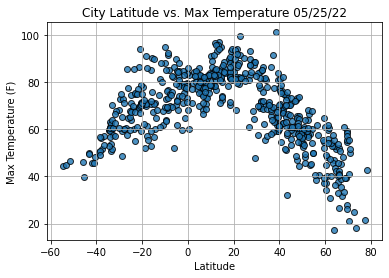

In [17]:
#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

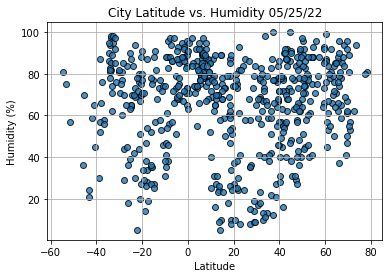

In [18]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

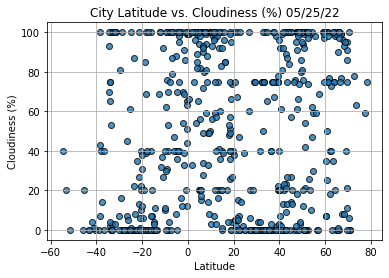

In [19]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

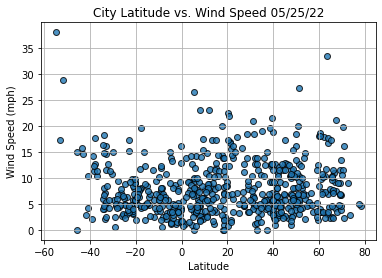

In [20]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [22]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

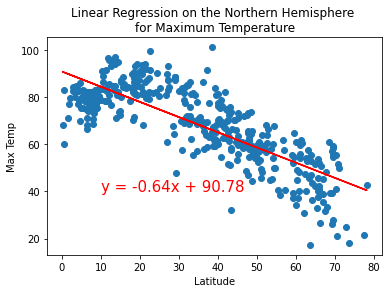

In [24]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp', (10,40))

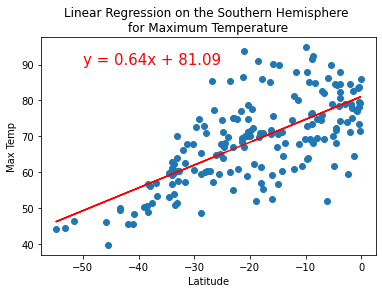

In [25]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

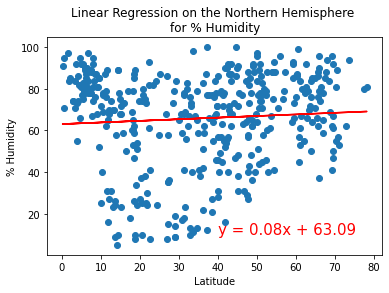

In [26]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

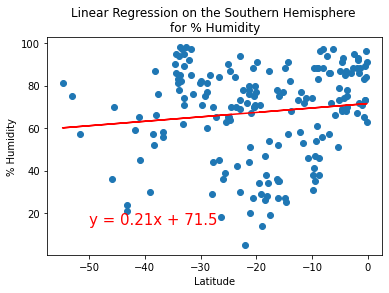

In [27]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

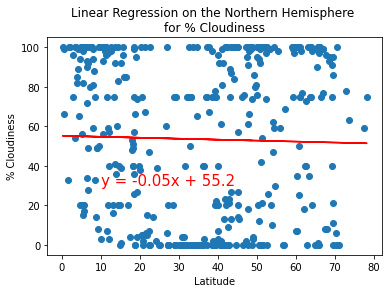

In [29]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,30))

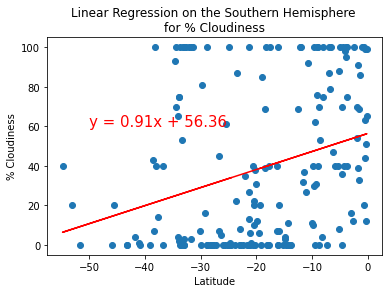

In [30]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

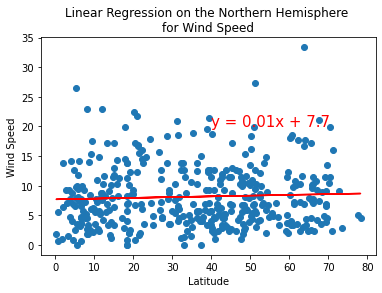

In [36]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,20))

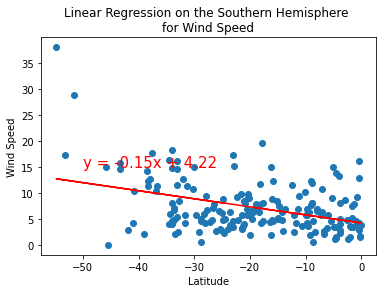

In [37]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,15))